## Making the Confusion Matrix
1. Logistic Regression
2. Decision Tree Classifier
3. Support Vector Machine
4. K-Nearest Neighbors
5. Handling Imbalance Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv('Social_Network_Ads.csv')
Data1 = Data.copy()
Data2 = Data.copy()
Data3 = Data.copy()
Data4 = Data.copy()
Data5 = Data.copy()
Data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


Text(0, 0.5, 'Salary')

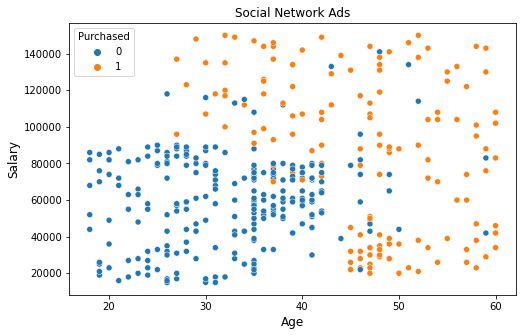

In [3]:
plt.figure(figsize = (8,5))

plt.title('Social Network Ads')

sns.scatterplot(x= 'Age', y = 'EstimatedSalary',hue = 'Purchased',data = Data)

plt.xlabel('Age', size = 12)
plt.ylabel('Salary', size = 12)

<AxesSubplot:title={'center':'Comparing Target Value'}, xlabel='Purchased', ylabel='count'>

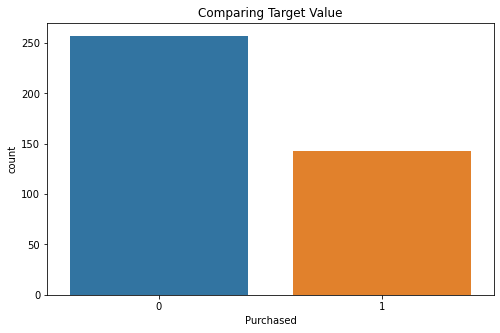

In [4]:
plt.figure(figsize = (8,5))
plt.title('Comparing Target Value') 

sns.countplot(x = 'Purchased',data = Data)

# Logistic Regression

In [102]:
Data1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [103]:
x = Data1.drop(columns = 'Purchased')
y = Data1.drop(columns = x)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)


In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [106]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train.values.ravel())

pred_train = LR.predict(X_train)

In [107]:
prediction = pd.DataFrame(pred_train,columns = ["Predicted"])

prediction.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

Value = pd.concat([prediction,y_train],axis = 1)
Value

,Predicted,Purchased
0,0,0
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
295,0,0
296,0,0
297,0,0
298,0,0


Text(33.0, 0.5, 'True')

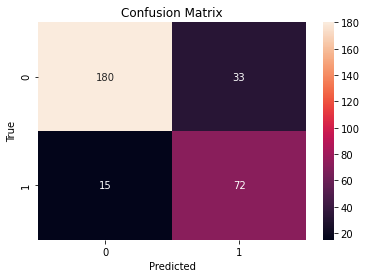

In [108]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Value.Predicted, Value.Purchased)

sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [109]:
from sklearn.metrics import accuracy_score
Accuracy_LR = accuracy_score(Value.Purchased,Value.Predicted)
Accuracy_LR

0.84

In [110]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Value.Purchased, Value.Predicted,  target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       195
           1       0.83      0.69      0.75       105

    accuracy                           0.84       300
   macro avg       0.84      0.80      0.82       300
weighted avg       0.84      0.84      0.84       300



# Decision Tree Classifier

In [111]:
Data2

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [112]:
x2 = Data2.drop(columns = 'Purchased')
y2= Data2.drop(columns = x)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.25, random_state = 45)

In [114]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train.values.ravel())

pred_train = DT.predict(X_train)

In [115]:
prediction = pd.DataFrame(pred_train,columns = ["Predicted"])

prediction.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

Value = pd.concat([prediction,y_train],axis = 1)
Value

,Predicted,Purchased
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
295,0,0
296,0,0
297,0,0
298,0,0


Text(33.0, 0.5, 'True')

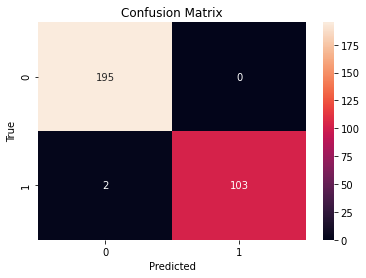

In [117]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Value.Purchased, Value.Predicted)

sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [119]:
from sklearn.metrics import accuracy_score
Accuracy_DT = accuracy_score(Value.Purchased,Value.Predicted)
Accuracy_DT

0.9933333333333333

In [121]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Value.Purchased, Value.Predicted,  target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       195
           1       1.00      0.98      0.99       105

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



# Support Vector Machine

In [122]:
Data3

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [123]:
x3 = Data3.drop(columns = 'Purchased')
y3= Data3.drop(columns = x)

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size = 0.25, random_state = 45)

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [126]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(X_train,y_train.values.ravel())

pred_train = SVC.predict(X_train)

In [127]:
prediction = pd.DataFrame(pred_train,columns = ["Predicted"])

prediction.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

Value = pd.concat([prediction,y_train],axis = 1)
Value

,Predicted,Purchased
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
295,0,0
296,0,0
297,0,0
298,0,0


Text(33.0, 0.5, 'True')

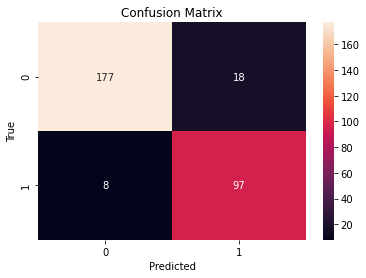

In [128]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Value.Purchased, Value.Predicted)

sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [129]:
from sklearn.metrics import accuracy_score
Accuracy_SVC = accuracy_score(Value.Purchased,Value.Predicted)
Accuracy_SVC

0.9133333333333333

In [130]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Value.Purchased, Value.Predicted,  target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       195
           1       0.84      0.92      0.88       105

    accuracy                           0.91       300
   macro avg       0.90      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300



# K-Nearest Neighbor

In [131]:
Data4

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [132]:
x4 = Data4.drop(columns = 'Purchased')
y4 = Data4.drop(columns = x)

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size = 0.25, random_state = 45)

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train.values.ravel())

pred_train = KNN.predict(X_train)

In [136]:
prediction = pd.DataFrame(pred_train,columns = ["Predicted"])

prediction.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

Value = pd.concat([prediction,y_train],axis = 1)
Value

,Predicted,Purchased
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
295,0,0
296,0,0
297,0,0
298,0,0


Text(33.0, 0.5, 'True')

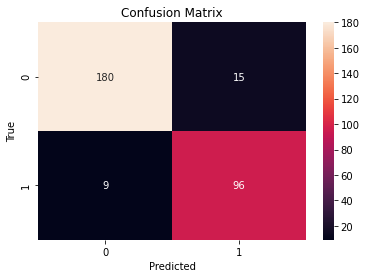

In [137]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Value.Purchased, Value.Predicted)

sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [138]:
from sklearn.metrics import accuracy_score
Accuracy_KNN = accuracy_score(Value.Purchased,Value.Predicted)
Accuracy_KNN

0.92

In [139]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Value.Purchased, Value.Predicted,  target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       195
           1       0.86      0.91      0.89       105

    accuracy                           0.92       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.92      0.92       300



# Comparing

In [152]:
Compar = pd.DataFrame({"Algorithm" :['Logistic Regression','Decision Tree','Support Vector Machine','K-NN'],"Accuracy":[Accuracy_LR,Accuracy_DT,Accuracy_SVC,Accuracy_KNN]})
Compar = Compar.sort_values('Accuracy',ascending=False)
Compar

,Algorithm,Accuracy
1,Decision Tree,0.993333
3,K-NN,0.920000
2,Support Vector Machine,0.913333
0,Logistic Regression,0.840000


Text(0, 0.5, 'Algorithm')

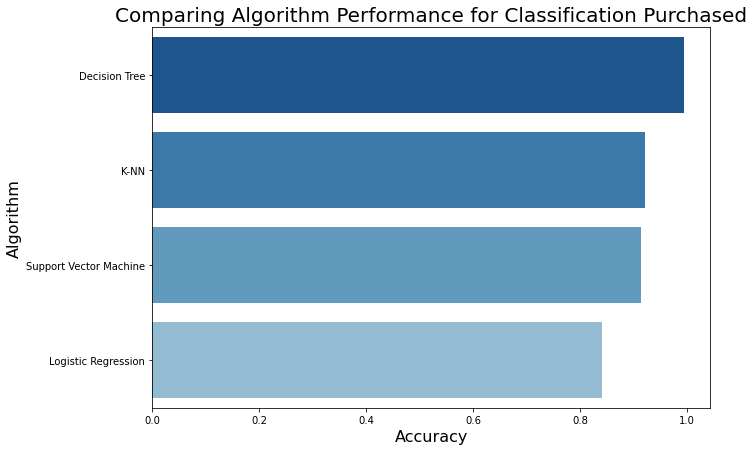

In [157]:
plt.figure(figsize = (10,7))
plt.title ("Comparing Algorithm Performance for Classification Purchased",size = 20)

sns.barplot(x = 'Accuracy', y ='Algorithm' ,data = Compar, palette = sns.color_palette("Blues_r"))

plt.xlabel("Accuracy", size =16)
plt.ylabel("Algorithm", size =16)

# Handling Imbalance Data

**Resampling data**

In [158]:
Data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<AxesSubplot:title={'center':'Comparing Target Value'}, xlabel='Purchased', ylabel='count'>

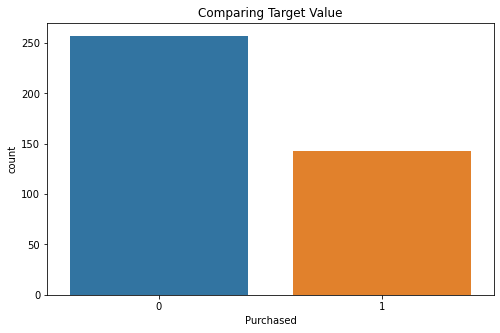

In [159]:
plt.figure(figsize = (8,5))
plt.title('Comparing Target Value') 

sns.countplot(x = 'Purchased',data = Data)

In [184]:
X = Data.iloc[:,:-1]
Y = Data.iloc[:,-1]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [180]:
!pip install imblearn

**Under Sampling**

In [190]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


print ("Comparing Data Purchased and Non Purchased",Counter(Y))

Un_Samp = RandomUnderSampler()
X_Un_samp,Y_Un_samp = Un_Samp.fit_resample(X,Y)

print ("After Undersampling",Counter(Y_Un_samp))

Comparing Data Purchased and Non Purchased Counter({0: 257, 1: 143})
After Undersampling Counter({0: 143, 1: 143})


**Over Sampling**

In [193]:
from imblearn.over_sampling import RandomOverSampler


print ("Comparing Data Purchased and Non Purchased",Counter(Y))

Ov_Samp = RandomOverSampler()
X_Ov_samp,Y_Ov_samp = Ov_Samp.fit_resample(X,Y)

print ("After Oversampling",Counter(Y_Ov_samp))

Comparing Data Purchased and Non Purchased Counter({0: 257, 1: 143})
After Oversampling Counter({0: 257, 1: 257})


**Both Sampling**

In [208]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Over = RandomOverSampler(sampling_strategy = 0.6)
under = RandomUnderSampler(sampling_strategy = 0.8)

print ("Comparing Data Purchased and Non Purchased",Counter(Y))

X_over,Y_over = Over.fit_resample(X,Y)
print ("After Oversampling",Counter(Y_over))


X_combine, Y_combine = under.fit_resample(X_over,Y_over)
print("After Both Sampling",Counter(Y_combine))

Comparing Data Purchased and Non Purchased Counter({0: 257, 1: 143})
After Oversampling Counter({0: 257, 1: 154})
After Both Sampling Counter({0: 192, 1: 154})


**Using Evaluation Metrics**

In [210]:
Data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [211]:
X = Data.drop(columns = ["Purchased"])
Y = Data.drop(columns = X)

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 45)

In [231]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [232]:
from sklearn.linear_model import LogisticRegression
Log_reg =LogisticRegression()
Log_reg.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [233]:
Prediction = Log_reg.predict(X_train)
prediction = pd.DataFrame(Prediction,columns = ["Predicted"])

prediction.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

Value = pd.concat([prediction,y_train],axis = 1)
Value

,Predicted,Purchased
0,0,0
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
295,0,0
296,0,0
297,0,0
298,0,0


In [235]:
from sklearn.metrics import classification_report
print ("Classification Report")
print (classification_report(Value.Purchased,Value.Predicted.values))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       195
           1       0.83      0.69      0.75       105

    accuracy                           0.84       300
   macro avg       0.84      0.80      0.82       300
weighted avg       0.84      0.84      0.84       300



**ROC & AUC**

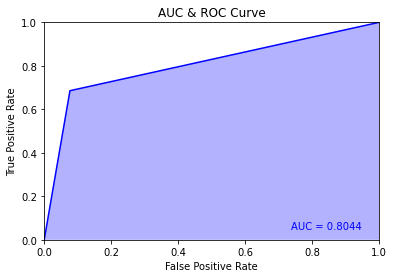

In [263]:
from sklearn import metrics

auc = metrics.roc_auc_score(Value.Purchased,Value.Predicted.values)
fp, tp, thresolds = metrics.roc_curve(Value.Purchased,Value.Predicted.values)

plt.title("AUC & ROC Curve")
plt.xlim([0, 1])
plt.ylim([0, 1])


plt.plot(fp, tp, 'b')

plt.fill_between(fp, tp, facecolor='blue', alpha=0.3)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**Precision & Recal Curve**

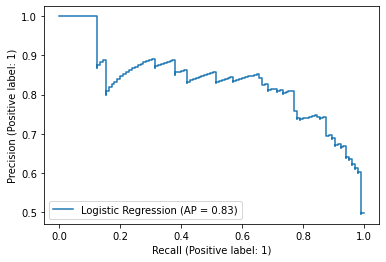

In [264]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve (Log_reg, X_train, y_train, name = 'Logistic Regression')